In [1]:
import numpy as np
import pandas as pd
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('VN_housing_dataset.csv')
df.head()

,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,1.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,3.0,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,4.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"


## DATA PREPROCESSING

In [3]:
df_cleaned = df.rename(columns = {'Ngày': 'Date', "Địa chỉ":"address", "Quận":"district", 
                                "Huyện":"ward", "Loại hình nhà ở":"house_type",
                                "Giấy tờ pháp lý":"legal_paper", "Số tầng":"floors",
                                "Số phòng ngủ":"bedrooms", "Diện tích":"Area(m2)",
                                "Dài":"length_meter", "Rộng":"width_meter", "Giá/m2":"Price/m2"})
df_cleaned = df_cleaned.drop("Unnamed: 0", axis = 1)
df_cleaned = df_cleaned.dropna()
df_cleaned = df_cleaned.reset_index()


Clean columns and convert numerical columns to float type

In [4]:
columns_to_clean = ['district', 'ward','floors','bedrooms','Area(m2)','length_meter','width_meter']

for col in columns_to_clean:
    df_cleaned[col] = df_cleaned[col].str.replace('Quận', '', regex=False)
    df_cleaned[col] = df_cleaned[col].str.replace('Phường', '', regex=False)
    df_cleaned[col] = df_cleaned[col].str.replace('phòng', '', regex=False)
    df_cleaned[col] = df_cleaned[col].str.replace('m²', '', regex=False)
    df_cleaned[col] = df_cleaned[col].str.replace('m', '', regex=False)
    df_cleaned[col] = df_cleaned[col].str.replace('m', '', regex=False)
    df_cleaned[col] = df_cleaned[col].str.strip()  # Xóa khoảng trắng thừa
df_cleaned.info()


    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11473 entries, 0 to 11472
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         11473 non-null  int64 
 1   Date          11473 non-null  object
 2   address       11473 non-null  object
 3   district      11473 non-null  object
 4   ward          11473 non-null  object
 5   house_type    11473 non-null  object
 6   legal_paper   11473 non-null  object
 7   floors        11473 non-null  object
 8   bedrooms      11473 non-null  object
 9   Area(m2)      11473 non-null  object
 10  length_meter  11473 non-null  object
 11  width_meter   11473 non-null  object
 12  Price/m2      11473 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df_cleaned = df_cleaned[df_cleaned['floors'] != 'Nhiều hơn 10']
df_cleaned = df_cleaned[df_cleaned['bedrooms'] != 'nhiều hơn 10']

In [6]:
df_cleaned.loc[df_cleaned['Price/m2'].str.contains(' tỷ/m²'), 'Price/m2'] = df_cleaned.loc[df_cleaned['Price/m2'].str.contains(' tỷ/m²'), 'Price/m2'].str.replace(' tỷ/m²','').str.replace('.','').str.replace(',','.').astype(float) * 1000
df_cleaned.loc[df_cleaned['Price/m2'].str.contains(' triệu/m²', na=False), 'Price/m2'] = df_cleaned.loc[df_cleaned['Price/m2'].str.contains(' triệu/m²', na=False), 'Price/m2'].str.replace(' triệu/m²','').str.replace(',','.').astype(float)
df_cleaned.loc[df_cleaned['Price/m2'].str.contains(' đ/m²', na=False), 'Price/m2'] = df_cleaned.loc[df_cleaned['Price/m2'].str.contains(' đ/m²', na=False), 'Price/m2'].str.replace(' đ/m²','').str.replace('.','').astype(float) * 0.000001


In [7]:
for col in ['floors','bedrooms','Area(m2)','length_meter','width_meter','Price/m2' ]:
    df_cleaned[col] = df_cleaned[col].astype('float')
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11313 entries, 0 to 11472
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         11313 non-null  int64  
 1   Date          11313 non-null  object 
 2   address       11313 non-null  object 
 3   district      11313 non-null  object 
 4   ward          11313 non-null  object 
 5   house_type    11313 non-null  object 
 6   legal_paper   11313 non-null  object 
 7   floors        11313 non-null  float64
 8   bedrooms      11313 non-null  float64
 9   Area(m2)      11313 non-null  float64
 10  length_meter  11313 non-null  float64
 11  width_meter   11313 non-null  float64
 12  Price/m2      11313 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 1.2+ MB


In [8]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
index,11313.0,41669.792540,2.366562e+04,2.000000,21363.00,41600.00,62151.00,8.236200e+04
floors,11313.0,4.397065,1.818701e+00,1.000000,4.00,4.00,5.00,7.300000e+01
bedrooms,11313.0,3.869884,1.368288e+00,1.000000,3.00,4.00,4.00,1.000000e+01
Area(m2),11313.0,54.570583,4.547308e+02,1.000000,33.00,40.00,52.00,4.000000e+04
length_meter,11313.0,45.741291,1.234976e+03,1.000000,8.00,10.00,12.00,1.200000e+05
width_meter,11313.0,17.793300,2.015967e+02,1.000000,3.70,4.00,5.00,5.500000e+03
Price/m2,11313.0,64652.661766,6.844541e+06,0.054081,70.19,89.39,114.56,7.280000e+08


Create dummies for categorical columns

In [9]:
dummy_house_type = pd.get_dummies(df_cleaned.house_type, prefix="housing_type")
dummy_legal_paper = pd.get_dummies(df_cleaned.legal_paper, prefix="legal_paper")
dummy_district = pd.get_dummies(df_cleaned.district, prefix="district")
dummy_ward = pd.get_dummies(df_cleaned.ward, prefix="ward")

df_housing = pd.concat([df_cleaned, dummy_house_type, dummy_legal_paper, dummy_district, dummy_ward], axis=1).drop(['index', 'Date', 'address', 'district', 'ward', 'house_type', 'legal_paper'], axis = 1)

df_housing = df_housing.replace({False: 0, True: 1})

df_housing['Price'] = df_housing['Price/m2'] * df_housing['Area(m2)'].round(decimals = 0)
df_housing.drop(columns = ['Price/m2'], inplace = True)

C:\Users\AD\AppData\Local\Temp\ipykernel_11784\1107667612.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_housing = df_housing.replace({False: 0, True: 1})


In [10]:
len(df_housing)
print("\nbefore replace outliers with nan:", df_housing.isna().sum().sum())


before replace outliers with nan: 0


## CHECK FOR OUTLIER USING BOXPLOT

In [11]:
import math

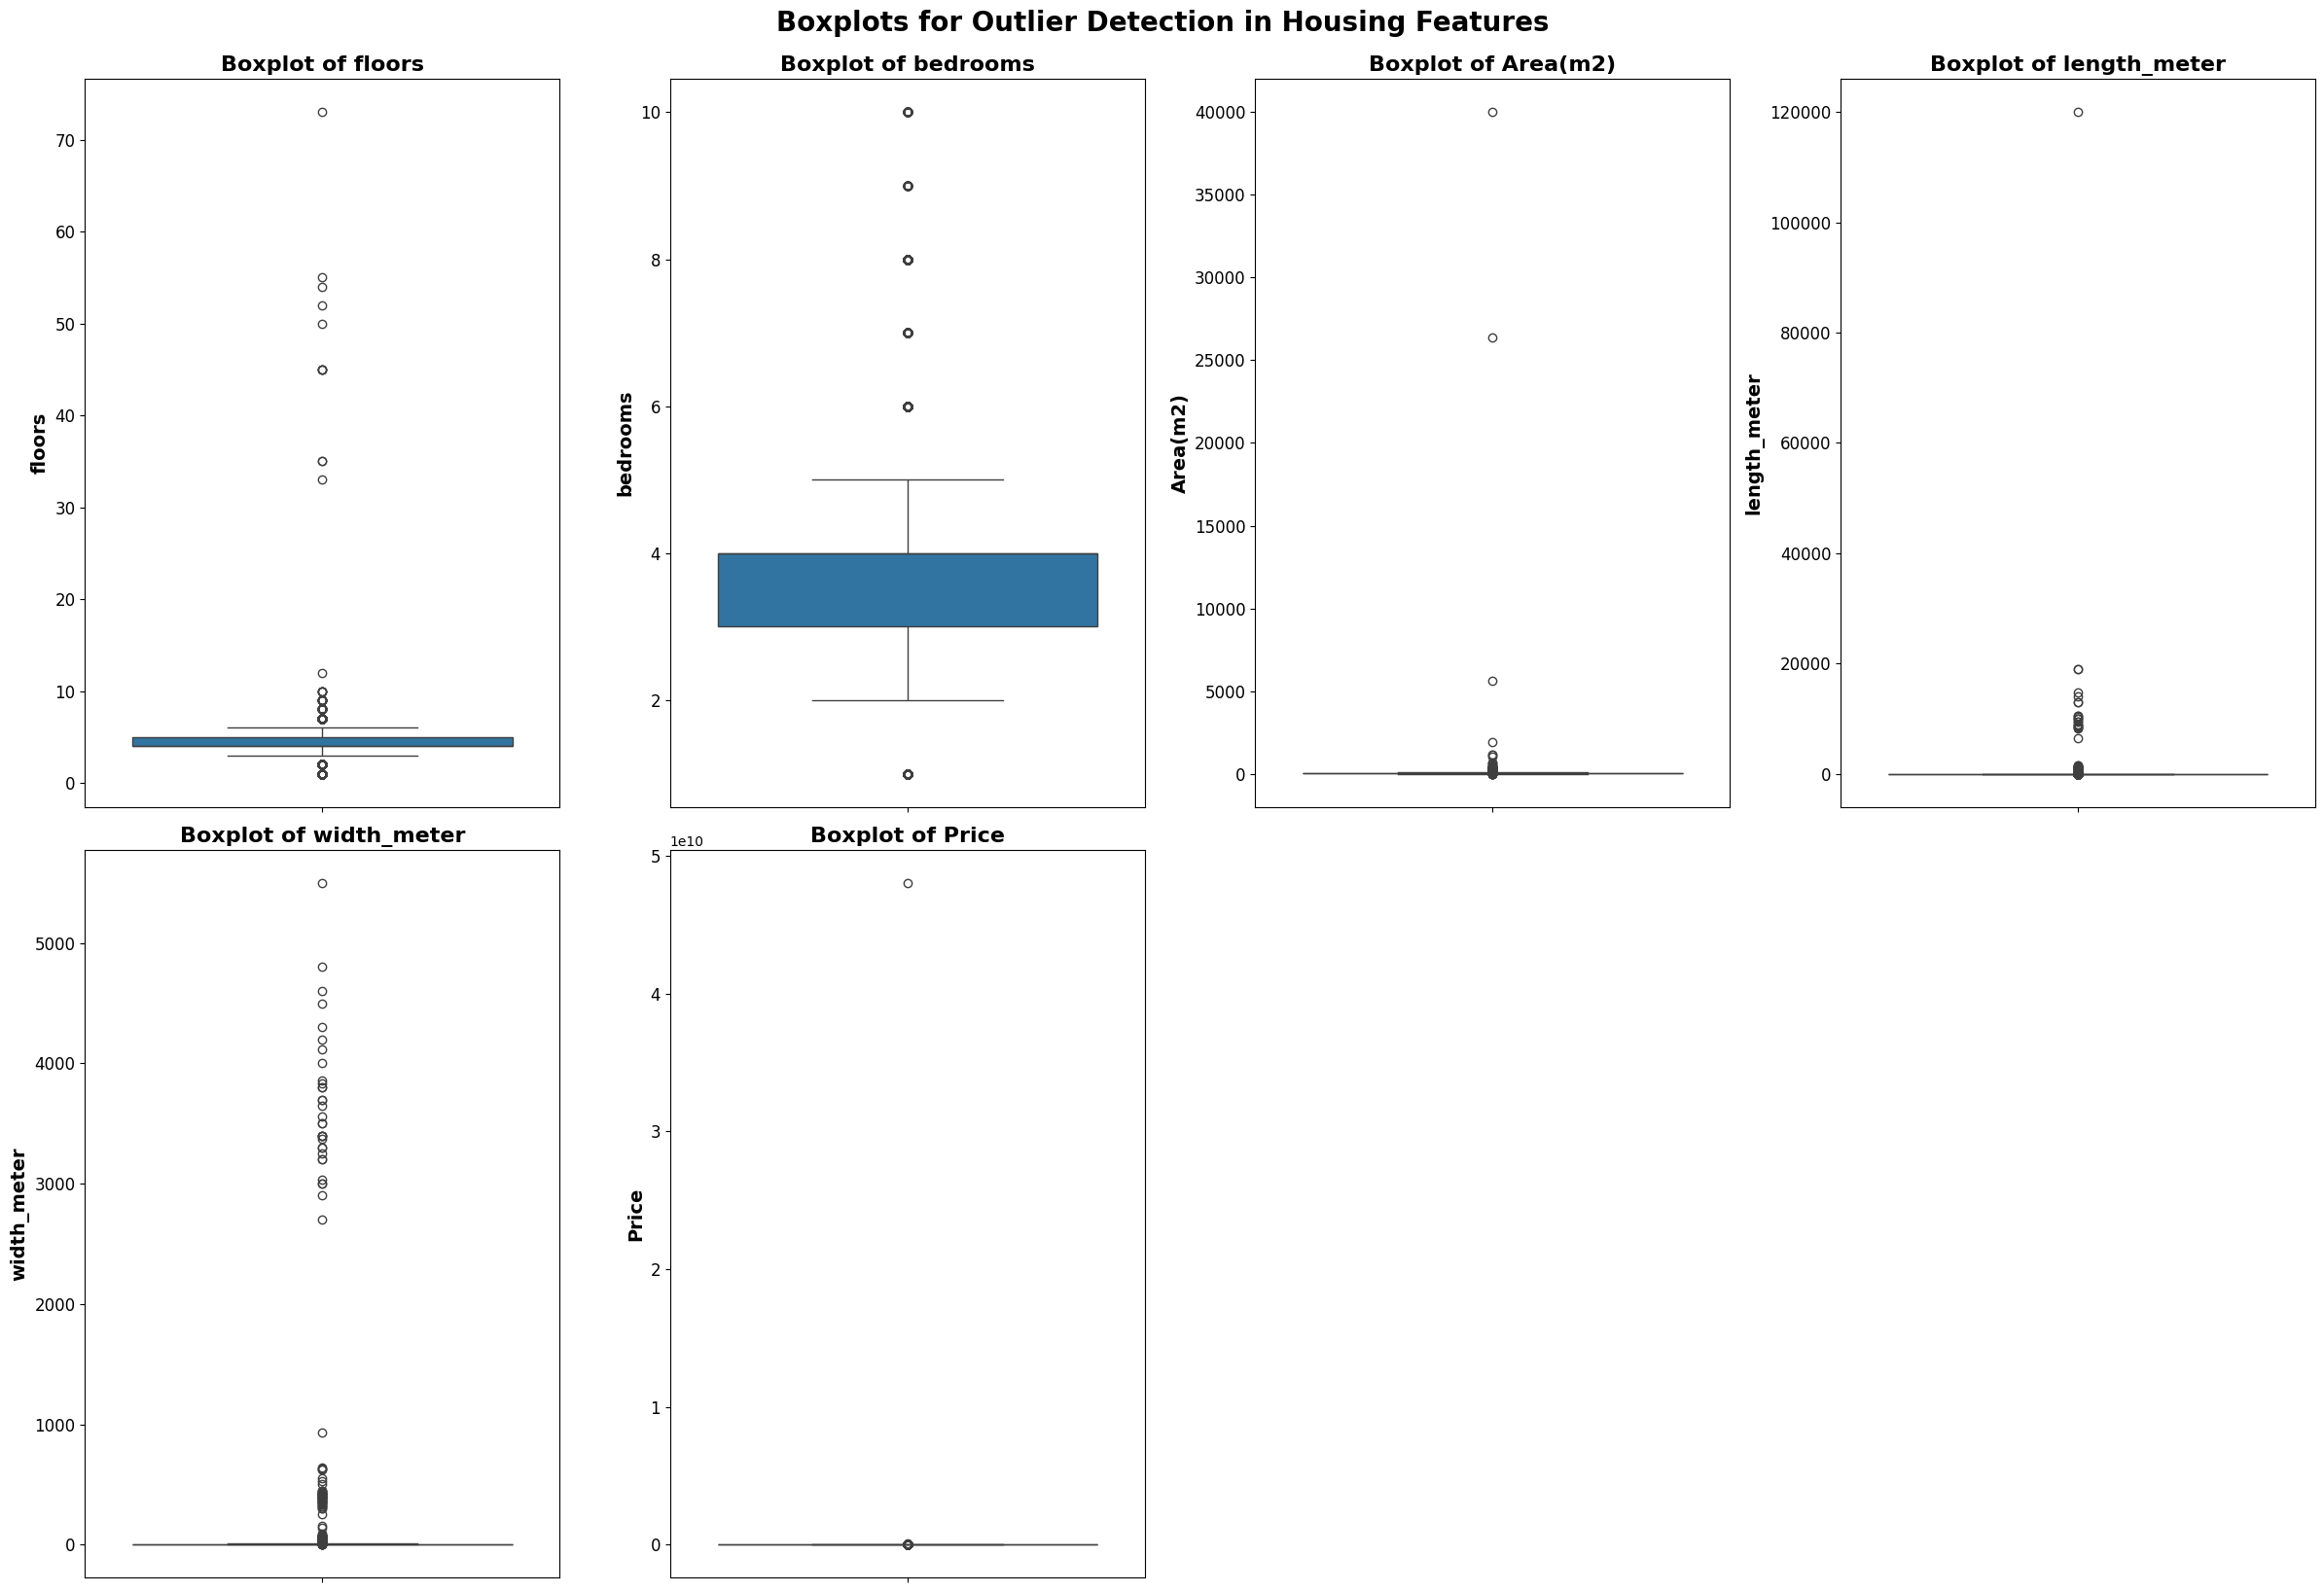

In [13]:
# Define the columns we want to plot
columns_to_plot = ['floors', 'bedrooms', 'Area(m2)', 'length_meter', 'width_meter', 'Price']

# Calculate the number of rows and columns for the subplot grid
n_cols = 4
n_rows = math.ceil(len(columns_to_plot) / n_cols)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 8 * n_rows))
fig.tight_layout(pad=5.0)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot boxplots for each selected column
for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=df_housing, y=col, ax=axes[i])
    
    # Set clear X and Y labels
    axes[i].set_xlabel('', fontsize=14)  # X-axis label is not needed for vertical boxplots
    axes[i].set_ylabel(col, fontsize=14, fontweight='bold')
    
    # Set a clear title
    axes[i].set_title(f'Boxplot of {col}', fontsize=16, fontweight='bold')
    
    # Increase tick label size
    axes[i].tick_params(labelsize=12)
    
    # Rotate x-axis labels if they're overlapping
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')

# Remove any unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Add a main title to the entire figure
fig.suptitle('Boxplots for Outlier Detection in Housing Features', fontsize=20, fontweight='bold', y=1.02)

plt.show()

## Removing outliers using IQR method


In [14]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
def handle_outliers_iqr(df, columns):

    cleaned_df = df.copy()  # Create a copy to avoid modifying the original DataFrame

    for column in columns:
        if column not in df.columns:
            print(f"Warning: Column '{column}' not found in DataFrame. Skipping.")
            continue

        print(f"Cleaning column: {column}")
        print(f"Existing Min, Max Values: {df[column].agg([min, max])}")

        # Calculate IQR and bounds
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identify and replace outliers
        cleaned_df[column] = df[column].apply(
            lambda x: np.nan if (x < lower_bound) or (x > upper_bound) or (x < 0) else x
        )

    return cleaned_df


In [17]:

columns_to_remove_outliers = ['floors', 'bedrooms', 'Area(m2)', 'length_meter', 'width_meter', 'Price']
for col in columns_to_remove_outliers:
    df_housing = handle_outliers_iqr(df_housing, [col]) # Pass only one column at a time
df_housing

Cleaning column: floors
Existing Min, Max Values: min     1.0
max    73.0
Name: floors, dtype: float64
Cleaning column: bedrooms
Existing Min, Max Values: min     1.0
max    10.0
Name: bedrooms, dtype: float64
Cleaning column: Area(m2)
Existing Min, Max Values: min        1.0
max    40000.0
Name: Area(m2), dtype: float64
Cleaning column: length_meter
Existing Min, Max Values: min         1.0
max    120000.0
Name: length_meter, dtype: float64
Cleaning column: width_meter
Existing Min, Max Values: min       1.0
max    5500.0
Name: width_meter, dtype: float64
Cleaning column: Price
Existing Min, Max Values: min    2.249996e+00
max    4.804800e+10
Name: Price, dtype: float64


,floors,bedrooms,Area(m2),length_meter,width_meter,housing_type_Nhà biệt thự,"housing_type_Nhà mặt phố, mặt tiền","housing_type_Nhà ngõ, hẻm",housing_type_Nhà phố liền kề,legal_paper_Giấy tờ khác,...,ward_Định Công,ward_Đống Mác,ward_Đồng Mai,ward_Đồng Nhân,ward_Đồng Tâ,ward_Đồng Xuân,ward_Đội Cấn,ward_Đức Giang,ward_Đức Thắng,Price
0,4.0,4.0,40.0,10.0,4.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2600.00
1,5.0,4.0,52.0,12.0,4.2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4850.04
2,5.0,5.0,NaN,18.0,5.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,9800.10
3,4.0,3.0,32.0,6.6,4.5,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1950.08
4,3.0,2.0,42.0,11.0,4.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1249.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11467,6.0,NaN,65.0,13.0,5.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,NaN
11468,NaN,2.0,37.0,13.0,3.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1599.88
11470,5.0,4.0,80.0,14.0,5.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
11471,3.0,5.0,NaN,NaN,4.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [18]:
print("\n After replace outliers with nan:",
    df_housing.isna().sum().sum())


 After replace outliers with nan: 5831


# Fillna using MICE method

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [20]:
columns_to_fill = ['floors', 'bedrooms', 'Area(m2)', 'length_meter', 'width_meter', 'Price']
missing_columns = df_housing.columns[df_housing.isnull().any()].tolist()

# Create binary indicators for NaN
for col in missing_columns:
    df_housing[f"{col}_missing"] = df_housing[col].isnull().astype(int)

# MICE imputation using IterativeImputer
mice_imputer = IterativeImputer(random_state=0, max_iter=10)
df_housing[columns_to_fill] = mice_imputer.fit_transform(df_housing[columns_to_fill]).round(decimals = 0)

In [27]:
df_final = df_housing
df_final 

,floors,bedrooms,Area(m2),length_meter,width_meter,housing_type_Nhà biệt thự,"housing_type_Nhà mặt phố, mặt tiền","housing_type_Nhà ngõ, hẻm",housing_type_Nhà phố liền kề,legal_paper_Giấy tờ khác,...,ward_Đội Cấn,ward_Đức Giang,ward_Đức Thắng,Price,floors_missing,bedrooms_missing,Area(m2)_missing,length_meter_missing,width_meter_missing,Price_missing
0,4.0,4.0,40.0,10.0,4.0,0,0,1,0,0,...,0,0,0,2600.0,0,0,0,0,0,0
1,5.0,4.0,52.0,12.0,4.0,0,0,1,0,0,...,0,0,0,4850.0,0,0,0,0,0,0
2,5.0,5.0,82.0,18.0,5.0,0,1,0,0,0,...,0,0,0,9800.0,0,0,1,0,0,0
3,4.0,3.0,32.0,7.0,4.0,0,0,1,0,0,...,0,0,0,1950.0,0,0,0,0,0,0
4,3.0,2.0,42.0,11.0,4.0,0,0,1,0,0,...,0,0,0,1250.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11467,6.0,5.0,65.0,13.0,5.0,0,0,0,1,0,...,0,0,0,7003.0,0,1,0,0,0,1
11468,4.0,2.0,37.0,13.0,3.0,0,0,1,0,0,...,0,0,0,1600.0,1,0,0,0,0,0
11470,5.0,4.0,80.0,14.0,5.0,0,1,0,0,0,...,0,0,0,7439.0,0,0,0,0,0,1
11471,3.0,5.0,56.0,13.0,4.0,0,1,0,0,0,...,0,0,0,4488.0,0,0,1,1,0,1


In [28]:
df_final['Price']= df_final['Price'] / 1000
df_final['Price'].round(1)

0        2.6
1        4.8
2        9.8
3        2.0
4        1.2
        ... 
11467    7.0
11468    1.6
11470    7.4
11471    4.5
11472    5.8
Name: Price, Length: 11313, dtype: float64

In [29]:
df_final.columns.to_list()

['floors',
 'bedrooms',
 'Area(m2)',
 'length_meter',
 'width_meter',
 'housing_type_Nhà biệt thự',
 'housing_type_Nhà mặt phố, mặt tiền',
 'housing_type_Nhà ngõ, hẻm',
 'housing_type_Nhà phố liền kề',
 'legal_paper_Giấy tờ khác',
 'legal_paper_Đang chờ sổ',
 'legal_paper_Đã có sổ',
 'district_Ba Đình',
 'district_Bắc Từ Liê',
 'district_Cầu Giấy',
 'district_Hai Bà Trưng',
 'district_Hoàn Kiế',
 'district_Hoàng Mai',
 'district_Huyện Chương Mỹ',
 'district_Huyện Gia Lâ',
 'district_Huyện Hoài Đức',
 'district_Huyện Mê Linh',
 'district_Huyện Phúc Thọ',
 'district_Huyện Quốc Oai',
 'district_Huyện Sóc Sơn',
 'district_Huyện Thanh Oai',
 'district_Huyện Thanh Trì',
 'district_Huyện Thường Tín',
 'district_Huyện Thạch Thất',
 'district_Huyện Đan Phượng',
 'district_Huyện Đông Anh',
 'district_Hà Đông',
 'district_Long Biên',
 'district_Na Từ Liê',
 'district_Thanh Xuân',
 'district_Thị xã Sơn Tây',
 'district_Tây Hồ',
 'district_Đống Đa',
 'ward_Biên Giang',
 'ward_Bách Khoa',
 'ward_Bùi

In [30]:
df_final = df_final.drop(columns = ['floors_missing',
 'bedrooms_missing',
 'Area(m2)_missing',
 'length_meter_missing',
 'width_meter_missing',
 'Price_missing'])

In [31]:
df_final

,floors,bedrooms,Area(m2),length_meter,width_meter,housing_type_Nhà biệt thự,"housing_type_Nhà mặt phố, mặt tiền","housing_type_Nhà ngõ, hẻm",housing_type_Nhà phố liền kề,legal_paper_Giấy tờ khác,...,ward_Định Công,ward_Đống Mác,ward_Đồng Mai,ward_Đồng Nhân,ward_Đồng Tâ,ward_Đồng Xuân,ward_Đội Cấn,ward_Đức Giang,ward_Đức Thắng,Price
0,4.0,4.0,40.0,10.0,4.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2.600
1,5.0,4.0,52.0,12.0,4.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4.850
2,5.0,5.0,82.0,18.0,5.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,9.800
3,4.0,3.0,32.0,7.0,4.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.950
4,3.0,2.0,42.0,11.0,4.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11467,6.0,5.0,65.0,13.0,5.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,7.003
11468,4.0,2.0,37.0,13.0,3.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.600
11470,5.0,4.0,80.0,14.0,5.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7.439
11471,3.0,5.0,56.0,13.0,4.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4.488


## EDA Feature Engineering

In [32]:
def Column_Info(df,column):
    print("Details of",column,"column")
    
    # DataType 
    print("\nDataType: ",df[column].dtype)
    
    #Check Nah
    count_null = df[column].isna().sum()
    if count_null == 0:
        print("\nThere are no null values")
    elif count_null > 0:
        print("\nThere are ",count_null," null values")
        
    # count Unique Values
    print("\nNumber of Unique Values: ",df[column].nunique())
    
    # Get AttributesAttributes of Column    
    print("\nDistribution of column:\n")
    print(df[column].value_counts())

In [33]:
df_final.columns

Index(['floors', 'bedrooms', 'Area(m2)', 'length_meter', 'width_meter',
       'housing_type_Nhà biệt thự', 'housing_type_Nhà mặt phố, mặt tiền',
       'housing_type_Nhà ngõ, hẻm', 'housing_type_Nhà phố liền kề',
       'legal_paper_Giấy tờ khác',
       ...
       'ward_Định Công', 'ward_Đống Mác', 'ward_Đồng Mai', 'ward_Đồng Nhân',
       'ward_Đồng Tâ', 'ward_Đồng Xuân', 'ward_Đội Cấn', 'ward_Đức Giang',
       'ward_Đức Thắng', 'Price'],
      dtype='object', length=281)

In [34]:
print(Column_Info(df_final, 'Price'))
print(Column_Info(df_final, 'floors'))
print(Column_Info(df_final, 'Area(m2)'))
print(Column_Info(df_final, 'bedrooms'))



Details of Price column

DataType:  float64

There are no null values

Number of Unique Values:  1227

Distribution of column:

Price
3.500    245
3.300    219
2.500    219
4.500    213
2.800    210
        ... 
6.832      1
6.573      1
0.105      1
5.556      1
4.488      1
Name: count, Length: 1227, dtype: int64
None
Details of floors column

DataType:  float64

There are no null values

Number of Unique Values:  4

Distribution of column:

floors
5.0    4847
4.0    4497
3.0    1354
6.0     615
Name: count, dtype: int64
None
Details of Area(m2) column

DataType:  float64

There are no null values

Number of Unique Values:  83

Distribution of column:

Area(m2)
40.0    949
30.0    858
35.0    836
50.0    664
45.0    654
       ... 
8.0       1
87.0      1
84.0      1
90.0      1
6.0       1
Name: count, Length: 83, dtype: int64
None
Details of bedrooms column

DataType:  float64

There are no null values

Number of Unique Values:  4

Distribution of column:

bedrooms
4.0    5229
3.0 

## DISTRIBUTIONION OF  VARIABLES

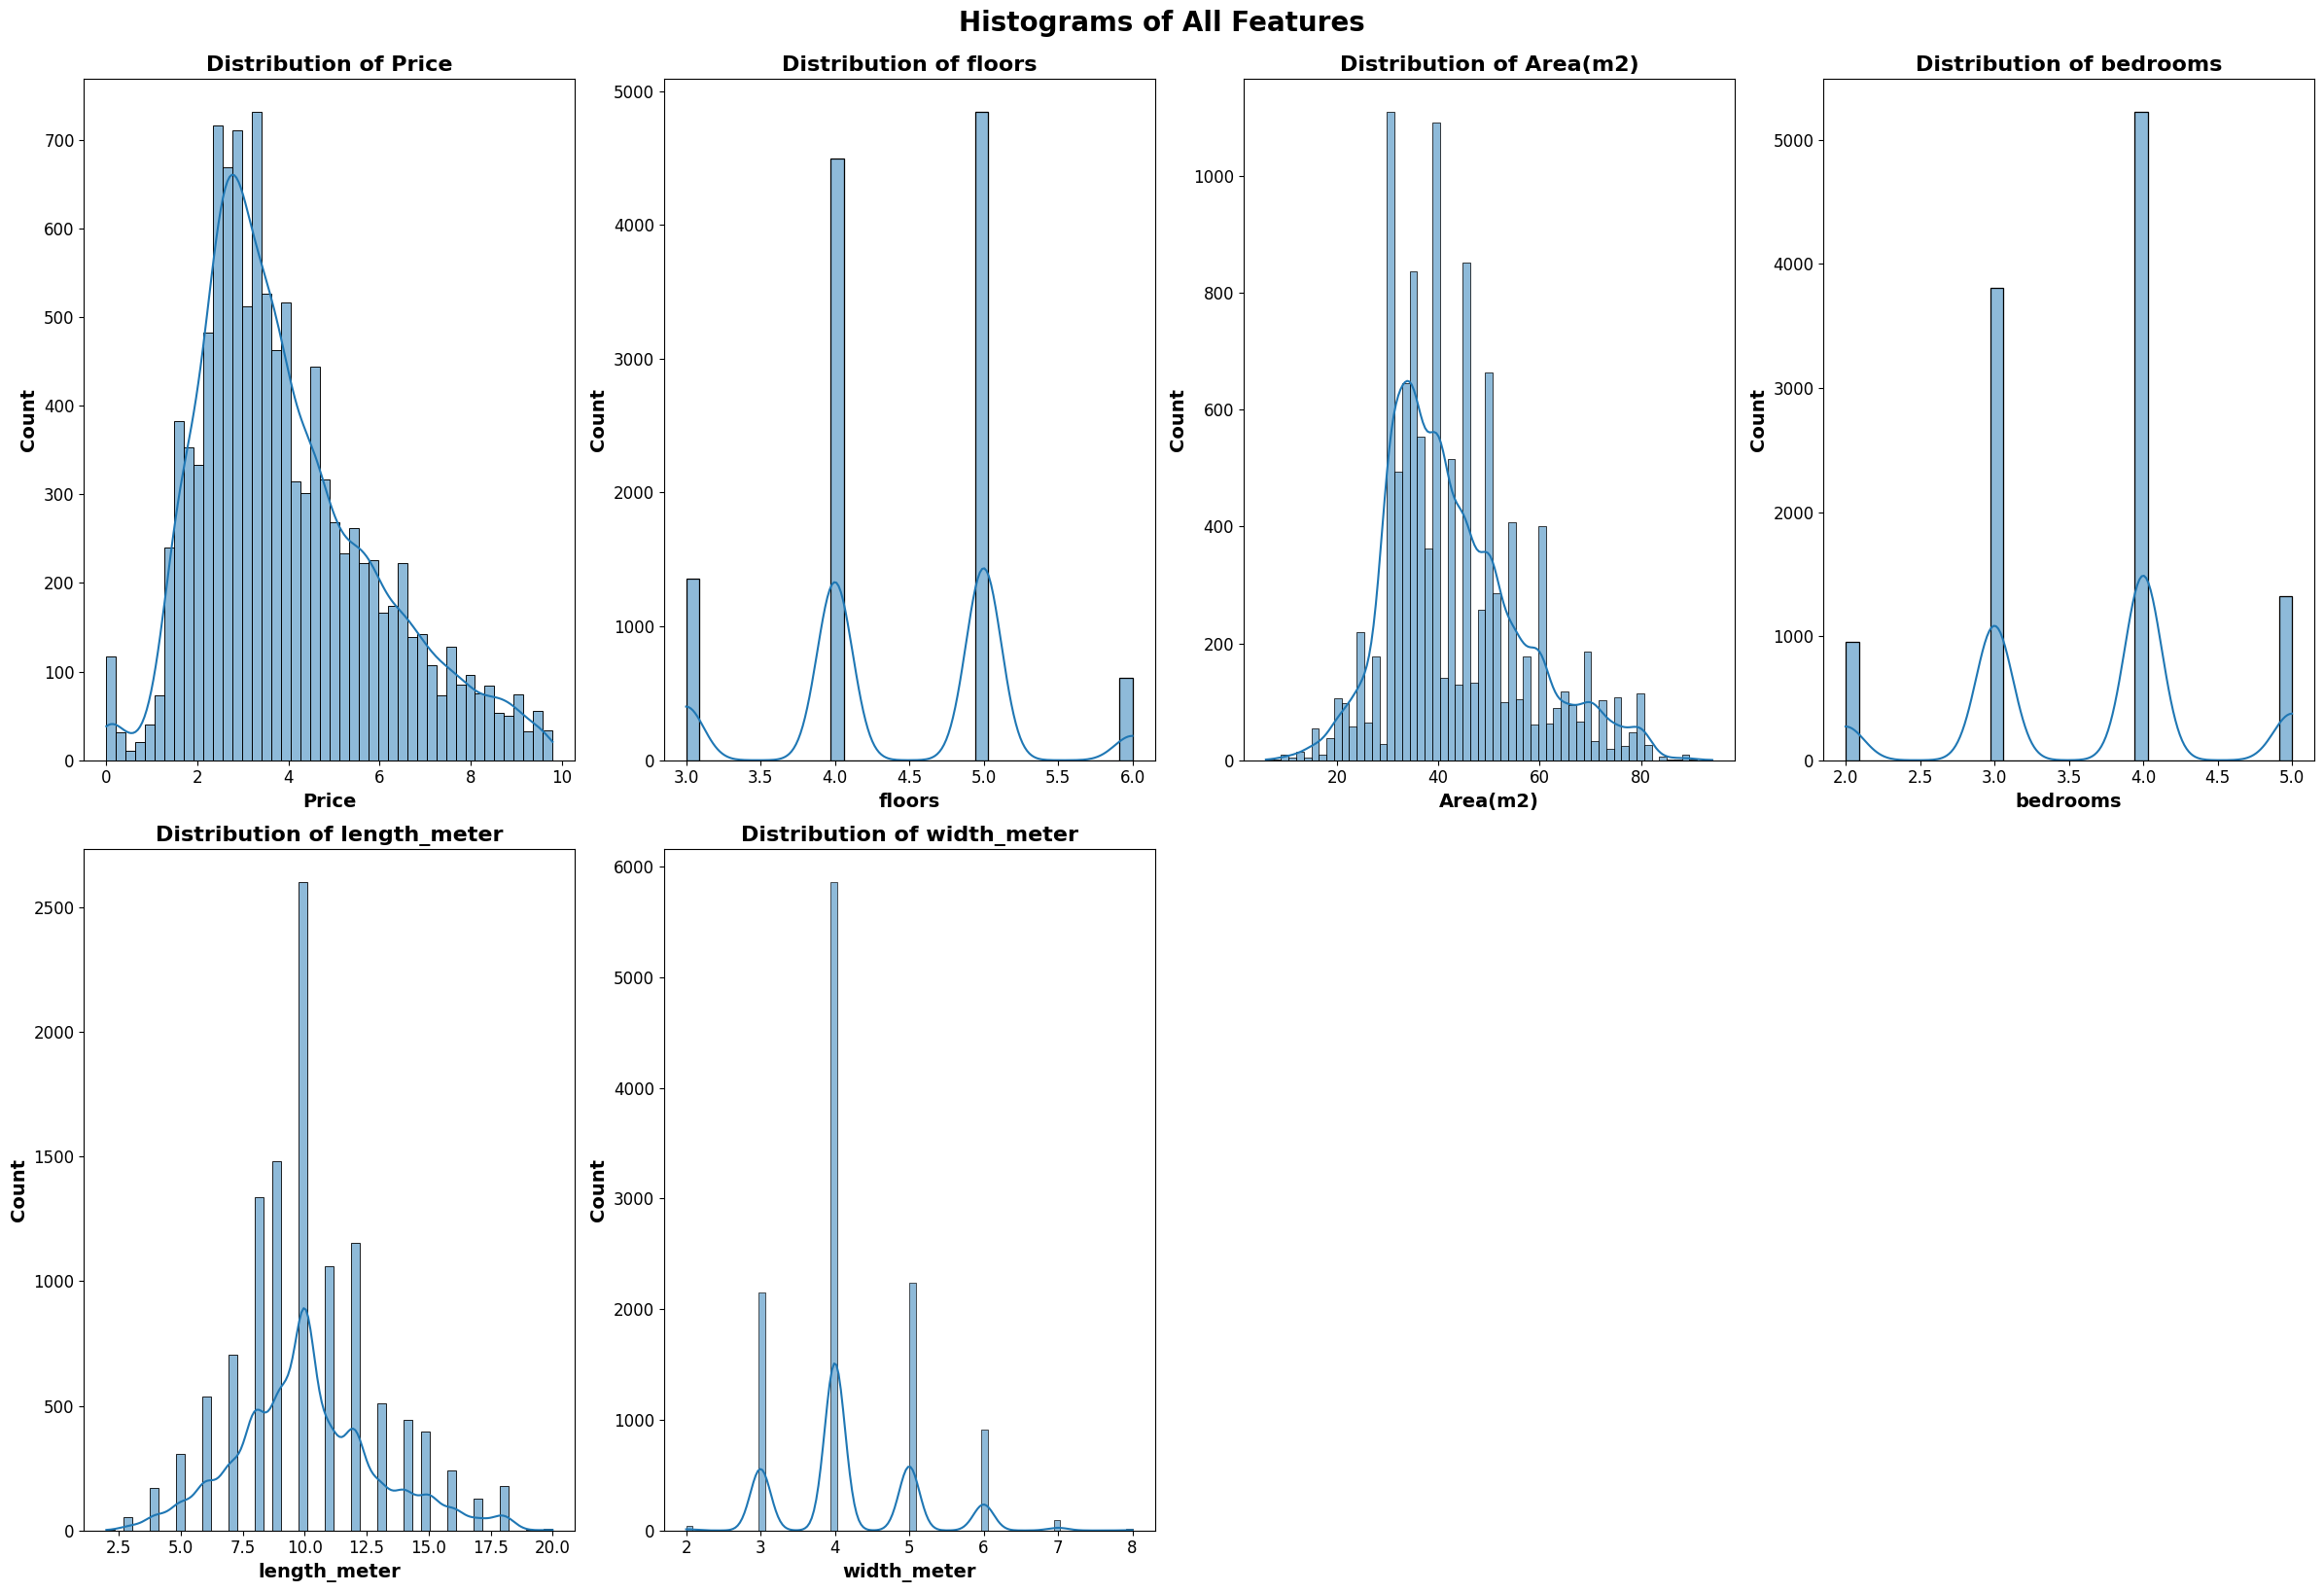

In [36]:
# Calculate the number of rows and columns for the subplot grid
important_columns = ['Price', 'floors', 'Area(m2)', 'bedrooms', 'length_meter', 'width_meter']
for col in important_columns:
    n_cols = 4
    n_rows = math.ceil(len(important_columns) / n_cols)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 8 * n_rows))
fig.tight_layout(pad=5.0)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot histplots for each column
for i, col in enumerate(important_columns):
    sns.histplot(data=df_final, x=col, ax=axes[i], kde=True)
    
    # Set clear X and Y labels
    axes[i].set_xlabel(col, fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=14, fontweight='bold')
    
    # Set a clear title
    axes[i].set_title(f'Distribution of {col}', fontsize=16, fontweight='bold')
    
    # Increase tick label size
    axes[i].tick_params(labelsize=12)

# Remove any unused subplots
for j in range(len(important_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Add a main title to the entire figure
fig.suptitle('Histograms of All Features', fontsize=20, fontweight='bold', y=1.02)

plt.show()

## SCATTERPLOT FOR FEATURES'S RELATIONSHIP

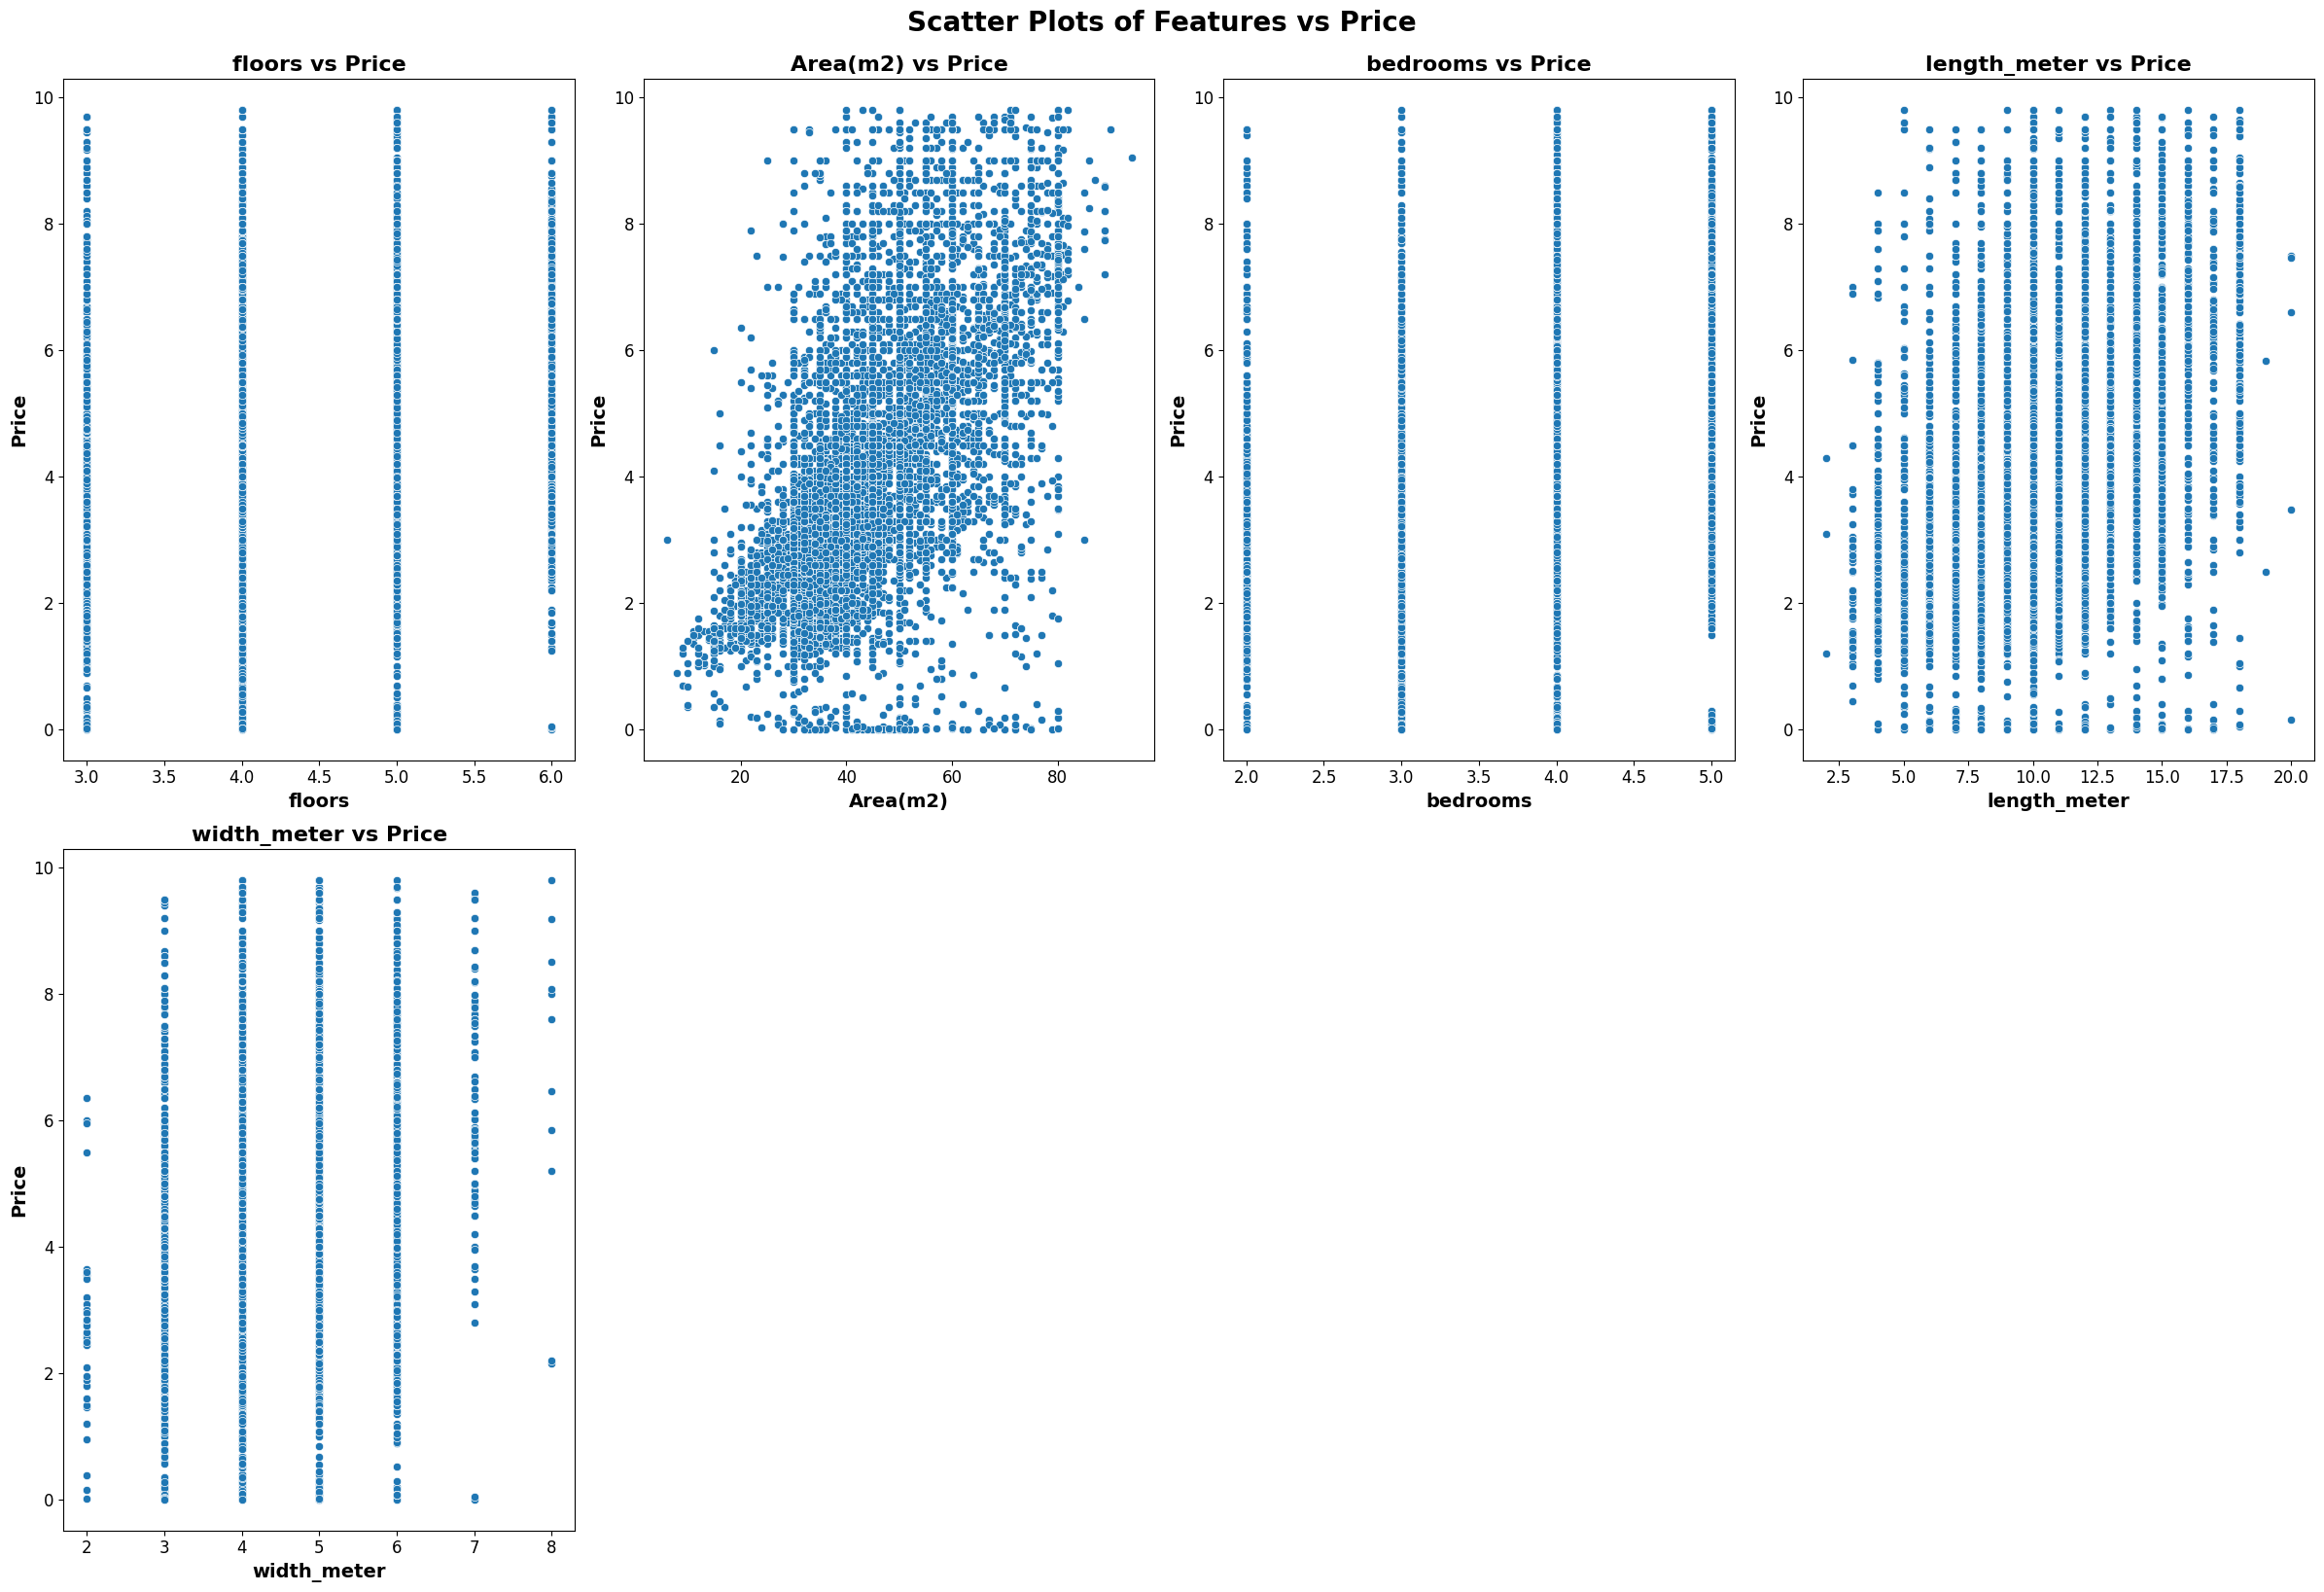

In [39]:
important_columns = ['Price', 'floors', 'Area(m2)', 'bedrooms', 'length_meter', 'width_meter']
for col in important_columns:
    n_cols = 4
    n_rows = math.ceil((len(important_columns) - 1) / n_cols)
# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 8 * n_rows))
fig.tight_layout(pad=6.0)
# Flatten the axes array for easier indexing
axes = axes.flatten()
# Plot scatter plots for each column against 'label'
i = 0
for col in important_columns:
        if col != 'Price':
            sns.scatterplot(data=df_final, x=col, y='Price', ax=axes[i])
        # Set clear X and Y labels
            axes[i].set_xlabel(col, fontsize=14, fontweight='bold')
            axes[i].set_ylabel('Price', fontsize=14, fontweight='bold')
        # Set a clear title
            axes[i].set_title(f'{col} vs Price', fontsize=16, fontweight='bold')
        # Increase tick label size
            axes[i].tick_params(labelsize=12)
        
            i += 1
# Remove any unused subplots
for j in range(i, len(axes)):
        fig.delaxes(axes[j])

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Add a main title to the entire figure
fig.suptitle('Scatter Plots of Features vs Price', fontsize=20, fontweight='bold', y=1.02)

plt.show()

## SCALE DATA AND BUILD MODEL

In [61]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import  GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score, KFold


In [42]:
X = df_final.drop(columns = 'Price').values
y = df_final['Price'].values

In [45]:
scaler = RobustScaler()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape, X_test.shape

((9050, 280), (2263, 280))

In [47]:
X_train, y_train = df_final.drop(columns = 'Price').values, df_final['Price'].values
X_train = scaler.fit_transform(X_train)

Evaluate the Optimal model between LinearRegression vs RandomForestRegressor 

In [48]:
X_test, y_test = df_final.drop(columns = 'Price').values, df_final['Price'].values
X_test = scaler.transform(X_test)

In [49]:
from sklearn.model_selection import cross_val_score, KFold

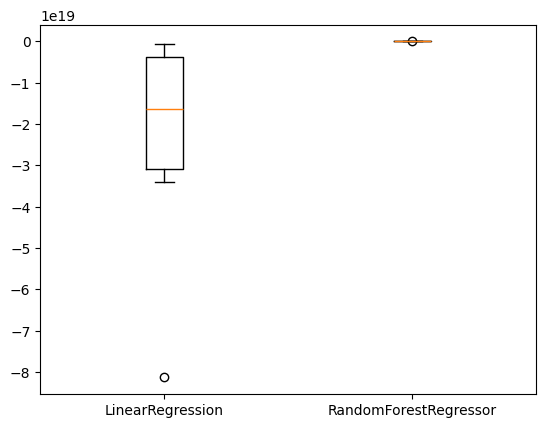

In [51]:
models = {"LinearRegression": LinearRegression(), "RandomForestRegressor": RandomForestRegressor()}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [52]:
for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print("{}  Accuracy: {}".format(name, test_score))

LinearRegression  Accuracy: 0.6047679492191765
RandomForestRegressor  Accuracy: 0.9309194630198911


=> THE OPTIMAL MODEL WOULD BE RandomForestRegressor

Try Model RandomForestRegressor

In [67]:
forest = RandomForestRegressor(n_estimators=100,random_state=42)
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)

In [69]:
#CHECK ACCURACY
score = r2_score(y_test, predictions)
print("The accuracy of the RandomForestRegressor model is {}%".format(round(score, 2) *100))

The accuracy of the RandomForestRegressor model is 93.0%


In [75]:
X_1 =df_final.drop(columns = 'Price')


In [87]:
importances = forest.feature_importances_
feature_importances = pd.DataFrame({'feature': X_1.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances.head(10)

,feature,importance
2,Area(m2),0.455096
0,floors,0.075502
3,length_meter,0.052778
1,bedrooms,0.039667
4,width_meter,0.023669
7,"housing_type_Nhà ngõ, hẻm",0.023039
6,"housing_type_Nhà mặt phố, mặt tiền",0.015340
14,district_Cầu Giấy,0.013127
37,district_Đống Đa,0.012606
31,district_Hà Đông,0.010895


## RESULT

In [88]:
# RandomForestRegressor result
predictions = pd.DataFrame(predictions)
predictions.rename(columns = {0:'Predicted Price(RandomForestRegressor)'}, inplace = True)


In [89]:
# Actual price
y_test = pd.DataFrame(y_test)
y_test.rename(columns = {0:'Actual Price'}, inplace = True)
y_test = y_test.reset_index(drop=True)


In [90]:
# result
df_result = y_test.join(predictions)
df_result

,Actual Price,Predicted Price(RandomForestRegressor)
0,2.600,2.727379
1,4.850,4.753300
2,9.800,8.980740
3,1.950,2.062800
4,1.250,1.501333
...,...,...
11308,7.003,6.818240
11309,1.600,1.726430
11310,7.439,7.411530
11311,4.488,4.679597


VISUALIZE THE RESULT (Using the first 10 result from each columns)

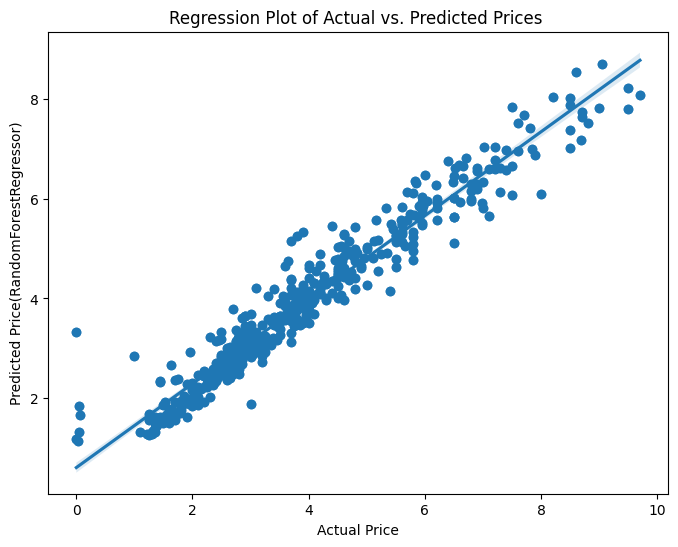

In [91]:
# Visualizations
# Sample a subset of the data for plotting (e.g., 500 points)
sample_size = 500
df_sample = df_result.sample(n=sample_size, random_state=42)

# Visualizations
plt.figure(figsize=(8, 6))
plt.scatter(df_sample['Actual Price'], df_sample['Predicted Price(RandomForestRegressor)'])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
sns.regplot(x="Actual Price", y="Predicted Price(RandomForestRegressor)", data=df_sample)
plt.title("Regression Plot of Actual vs. Predicted Prices ")
plt.show()

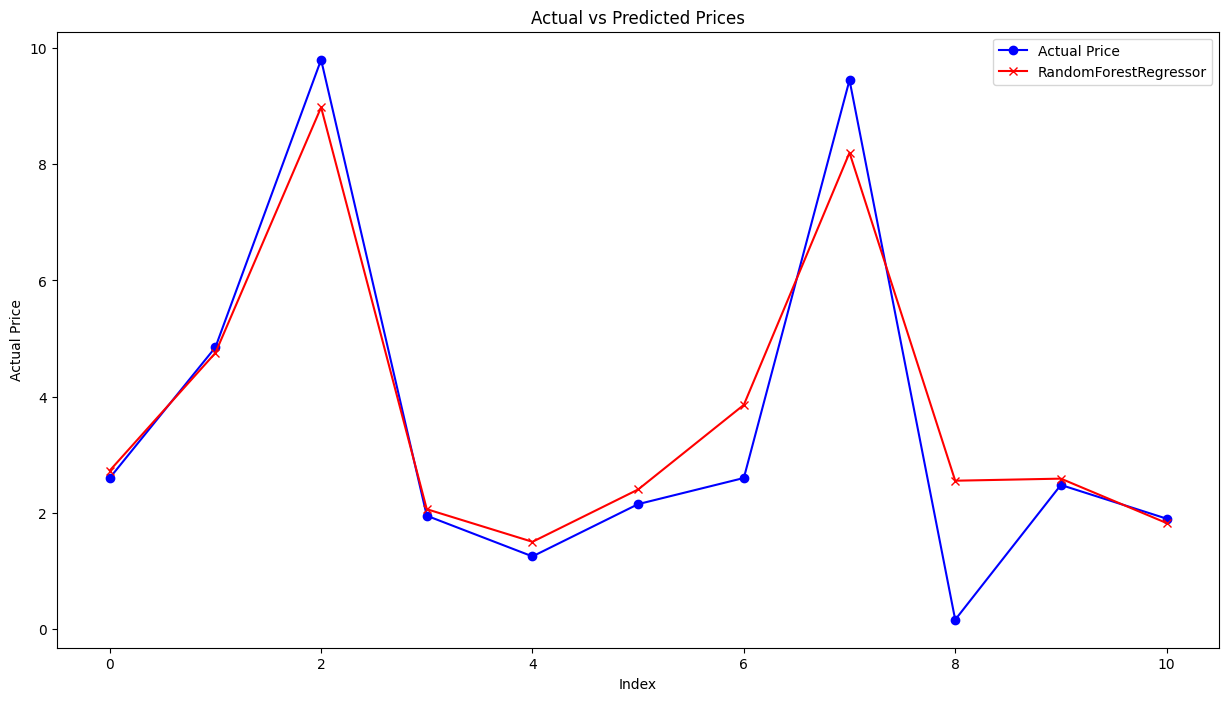

In [92]:
plt.subplots(figsize = (15,8))
plt.plot(y_test.loc[:10,:],label = 'Actual Price', color = 'b',marker='o')
plt.plot(predictions.loc[:10,:], label = 'RandomForestRegressor', color = 'r',marker='x')
# give labels and title
plt.xlabel("Index")
plt.ylabel("Actual Price")
plt.title('Actual vs Predicted Prices')
# give legend
plt.legend()

plt.show()